In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from random import randint


from classes import ALTURAS, COLUNAS
from classes.gerente import GerenteRemocao
from classes.patio import Container, Pilha, Patio

NCONTAINERS = 20000

patio = Patio()
gerente = GerenteRemocao(patio)
def gera_containers_transito(n=NCONTAINERS):
    tempos =  np.random.normal(20, 5, NCONTAINERS)
    containers_transito = [Container('{:05d}'.format(numero), tempos[i]) 
                       for i, numero in enumerate(range(1, NCONTAINERS))] 
    return containers_transito

def gera_agendamento_containers(containers_transito, dias=30, qtdedia=200, erro=2):
    agendamentos = defaultdict(list)
    container_por_tempo = defaultdict(list)
    for c in containers_transito:
        container_por_tempo[int(c.time_to_leave)].append(c)
    for dia in range(1, dias):
        tempos_dia = np.random.normal(0, erro, qtdedia) + dia
        for t in tempos_dia:
            containers = container_por_tempo[int(t)]
            if containers:
                container_transito = containers.pop(randint(0, len(containers) - 1))
                if container_transito:
                    agendamentos[dia].append(container_transito)
    return agendamentos
        
    

[00001, 00002, 00003, 00004, 00005, 00006, 00007, 00008, 00009, 00010]


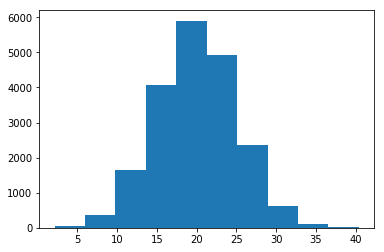

In [2]:
containers_transito = gera_containers_transito()
plt.hist([c.time_to_leave for c in containers_transito])
print(containers_transito[:10])

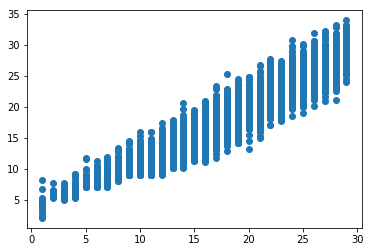

In [3]:
containers_agendados = gera_agendamento_containers(containers_transito)

x = []
y = []
for dia, containers in containers_agendados.items():
    for c in containers:
        x.append(dia)
        y.append(c.time_to_leave)
    
plt.scatter(x, y)

In [4]:
gerente.add_container(containers_transito[0])

'A1'

In [5]:
print(patio._pilhas)

OrderedDict([('0001', <classes.patio.Pilha object at 0x7fb456facac8>)])


In [6]:
for coluna in patio._pilhas['0001']._pilha.items():
    print(coluna)

('A', OrderedDict([('1', 00001), ('2', None), ('3', None), ('4', None), ('5', None)]))
('B', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('C', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('D', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('E', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('F', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))


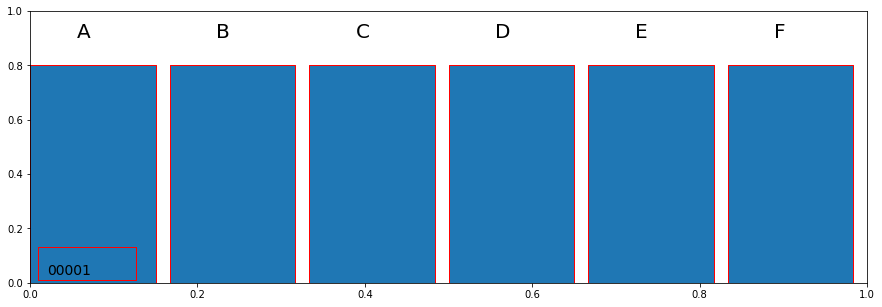

In [7]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle


def plot_patio(patio):
    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot(111)
    passo_x = 1 / len(COLUNAS)
    passo_y = .8 / len(ALTURAS)
    boxes = []
    for c, coluna in enumerate(patio._pilhas['0001']._pilha.items()):
        rect = Rectangle((passo_x * c, 0), passo_x*.9, .8)
        boxes.append(rect)
        posicao_x = passo_x * c
        ax.text(passo_x * c + (passo_x /3), .9, coluna[0], fontsize=20)
        for altura, container in coluna[1].items():
            if container is not None:
                posicao_y = passo_y * (int(altura) - 1) + .01
                ax.text(posicao_x + .02, posicao_y + .02,
                        container, fontsize=14)
                rect = Rectangle((posicao_x + .01,
                                  posicao_y),
                                 passo_x * .7, .12)

                boxes.append(rect)

    pc = PatchCollection(boxes, edgecolor='r')
    ax.add_collection(pc)
plot_patio(patio)

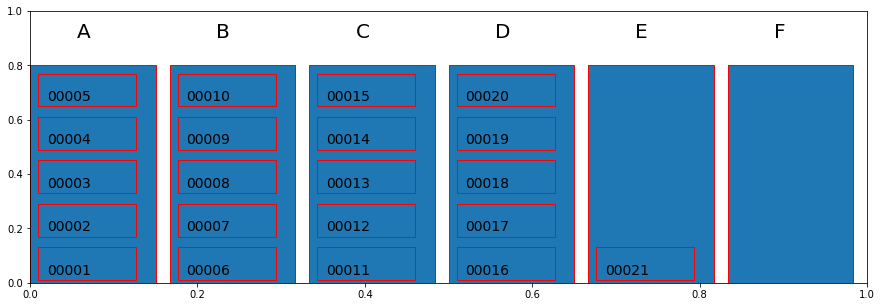

In [8]:
patio = Patio()
gerente = GerenteRemocao(patio)
for i in range(21):
    gerente.add_container(containers_transito[i])
plot_patio(patio)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[]
[(1.184255348689117, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(4.358814616031539, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(0.9767200440463135, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(0.9334677472387511, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(3.883596874946498, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(2.1591914990818566, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(0.06605998927573964, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(2.4269331609277813, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(2.9897877555837233, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(4.944741150097126, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(4.3498295357127255, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(3.0413607912316287, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(3.245804630041672, <classes.patio.Pilha object at 0x7fb459

[(11.490952556853712, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(10.109985582260187, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(10.745189470367627, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(10.722416435371596, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(9.992828353390681, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(11.625560423310288, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(11.023832754156691, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(10.431753471896139, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(10.016754541669037, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(9.398206242960782, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(9.297902923329172, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(10.009545988868435, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(11.941380947681466, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(13.509483890462207, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(11.1475

[(13.560066293533417, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(16.207967606614453, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(16.150625595596498, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(17.389275887218876, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(15.714226153701938, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(15.634563159918658, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(17.86432717064238, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(15.909976480234716, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(15.902037946758536, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(13.73303963765607, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(18.801662826033414, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(15.81047728542104, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(17.864979099338647, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(14.397112630000638, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(15.4278

[(21.11516728239645, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(21.55998091710547, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(20.03339844814412, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(18.742232130217104, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(19.12649544285617, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(19.317227798248936, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(21.535558597646478, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(22.634503283668835, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(19.461941390360423, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(20.665041222551196, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(21.567213718270683, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(16.529611496154487, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(18.034638160111992, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(20.694823759598457, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(19.74685

[(23.723264949443656, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(26.215454466100883, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(25.290607396170063, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(21.279774513845595, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(22.77845501401016, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(19.902231132924936, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(24.937544666746284, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(22.77199130003671, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(24.758289982836942, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(24.04380693629671, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(22.10722558123614, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(21.884103700015533, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(23.646650015333297, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(25.54599581785092, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(22.976315

[(29.33114647717436, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(28.494451704599097, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(26.918745691143727, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(24.255075685265687, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(25.03934319476946, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(24.455787463033452, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(24.733840631030105, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(23.67570003582401, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(28.21793442801073, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(24.080682683580754, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(25.088755314699167, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(28.786814279138646, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(27.52401378512187, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(25.62602940063416, <classes.patio.Pilha object at 0x7fb459117ba8>)]
[(28.0359691

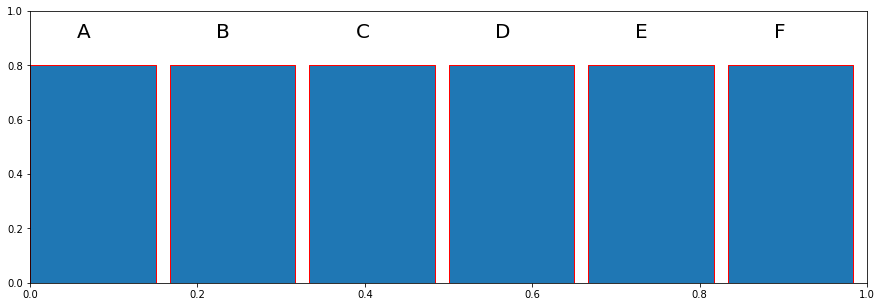

In [34]:
%load_ext autoreload
%autoreload 2

containers_transito = gera_containers_transito()
containers_agendados = gera_agendamento_containers(containers_transito)
patio = Patio()
gerente = GerenteRemocao(patio)
for dia, containers in containers_agendados.items():
    for c in containers:
        containers_transito.pop(containers_transito.index(c))
        pilha = gerente.pilha_mesmo_tempo(c)
        nome_pilha = None
        if pilha:
            nome_pilha = pilha._nome
        gerente.add_container(c, nome_pilha)
plot_patio(patio)

In [33]:
gerente._patio._pilhas

OrderedDict([('0001', <classes.patio.Pilha at 0x7fb45701be10>)])